# MACHINE LEARNING CAPSTONE PROJECT

On this final project, we are going to predict by different kind of Machine Learning algorithms the income of customers based on their shopping patterns.

First, we will review the most important features of the dataset, like their columns, statistical measures and categorical importance.

After that we are going to apply a Linear regression model, then a Random Forest Classification and finally an unsupervised  PCA algorithm.

And at the end, provide the results and conclusions.

### Author
Ulises José Bustamante Mora

<a href="https://www.linkedin.com/in/ulisesbmora/">LinkedIn</a>

<a href="https://github.com/UlisesBM1998">GitHub</a>

# DATASET METADATA

Source: https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset

Number of entries: 2240

Privacy: Open source

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# IMPORTING THE DATASET

In [2]:
df_lr = pd.read_csv("superstore_data.csv")
df_lr.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


# DATASET FEATURES AND STATISTICAL MEASURES

In [3]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Note: No null values. 22 columns which three are categorial variables and the rest numeric variables.

In [4]:
df_lr.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


# EXPLORATORY DATA ANALYSIS

### Plotting which education level has more income in ten thousand dollars scale.

<AxesSubplot:xlabel='Education'>

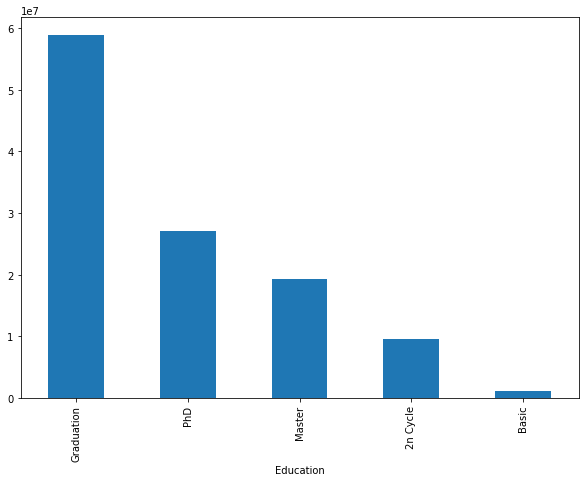

In [5]:
plt.figure(figsize=(10,7))
df_lr.groupby("Education")["Income"].sum().sort_values(ascending = False).plot(kind = "bar")

### Plotting which Marital status has more income in ten thousand dollars scale.

<AxesSubplot:xlabel='Marital_Status'>

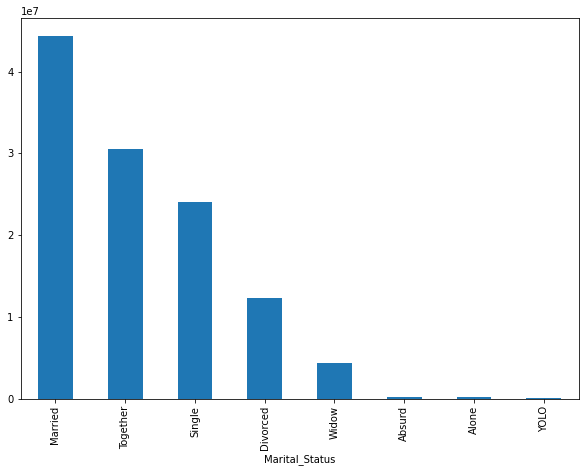

In [6]:
plt.figure(figsize=(10,7))
df_lr.groupby("Marital_Status")["Income"].sum().sort_values(ascending = False).plot(kind = "bar")

### As we are going to predict the Income, we will see which variables have the most correlation.

In [7]:
df_lr.corr()["Income"].sort_values()

NumWebVisitsMonth     -0.553088
Kidhome               -0.428669
Year_Birth            -0.161791
NumDealsPurchases     -0.083101
Complain              -0.027225
Recency               -0.003970
Id                     0.013095
Teenhome               0.019133
Response               0.133047
MntGoldProds           0.325916
NumWebPurchases        0.387878
MntFruits              0.430842
MntFishProducts        0.438871
MntSweetProducts       0.440744
NumStorePurchases      0.529362
MntWines               0.578650
MntMeatProducts        0.584633
NumCatalogPurchases    0.589162
Income                 1.000000
Name: Income, dtype: float64

In this case:

NumCatalogPurchases, MntMeatProducts, MntWines, NumStorePurchases have a medium positive correlation.

NumWebVisitsMonth and Kidhome have a medium negative correlation.

### Plotting the correlation between the Income and the number of web visits per month.

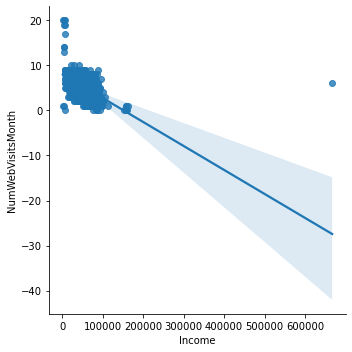

In [8]:
sns.lmplot(x="Income", y="NumWebVisitsMonth", data = df_lr)

### Plotting the correlation between the Income and the number of catalog purchases.

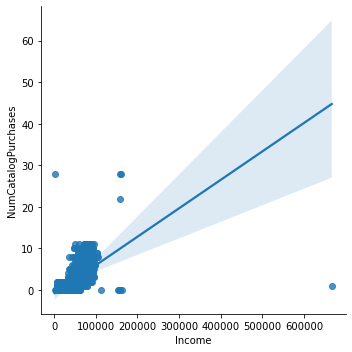

In [9]:
sns.lmplot(x="Income", y="NumCatalogPurchases", data = df_lr)

### Plotting how distributed is the Income variables, most of the values are between 0 and 100.000 USD

<Figure size 1080x504 with 0 Axes>

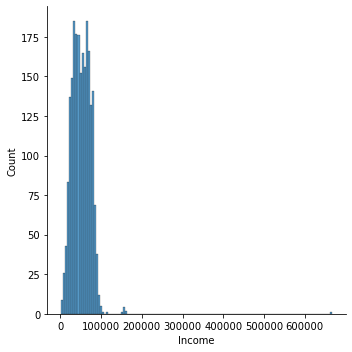

In [10]:
plt.figure(figsize=(15,7))
sns.displot(df_lr["Income"])

### Noticed outliers on the y

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

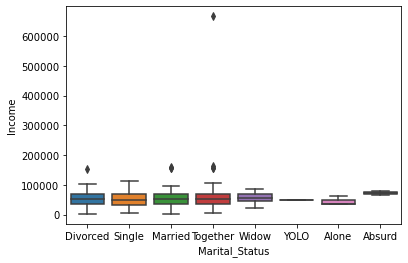

In [11]:
sns.boxplot(y = df_lr["Income"], x =  df_lr["Marital_Status"], data = df_lr)

### Removing all outliers (they were four values that represent the 0,18% of the dataset)

In [12]:
df_lr = df_lr.where(df_lr["Income"]< 150000)

### Confirming that all outliers were deleted

In [13]:
df_lr.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,5586.900815,1968.807065,51633.638134,0.442029,0.506341,49.014040,306.100996,26.435236,165.347826,37.758605,27.122283,44.110960,2.316576,4.098279,2.644928,5.819293,5.334239,0.150815,0.009511
std,3249.110303,11.991913,20713.376530,0.537063,0.544325,28.938638,337.516270,39.842478,217.852649,54.813323,41.116999,51.852016,1.885450,2.736724,2.798441,3.241866,2.413837,0.357950,0.097081
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51301.000000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8418.500000,1977.000000,68289.750000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


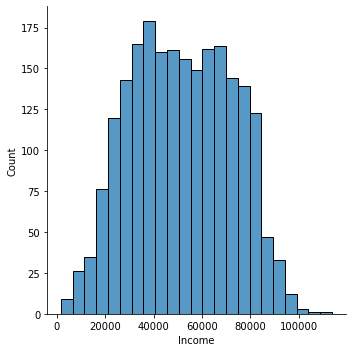

In [55]:
sns.displot(df_lr["Income"])

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

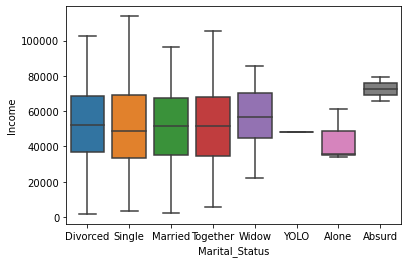

In [14]:
sns.boxplot(y = df_lr["Income"], x =  df_lr["Marital_Status"], data = df_lr)

# EXTRACT, TRANSFORM AND LOAD

As we saw on the categorial charts, those variables are pretty important because it shows a clear different between them. So let's create dummies variables or one hot coding to tranform those categorial variables into numerical ones.

In [15]:
marital = pd.get_dummies(df_lr["Marital_Status"])
marital.head()

,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0


In [16]:
education = pd.get_dummies(df_lr["Education"])
education.head()

,2n Cycle,Basic,Graduation,Master,PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


First, we create a pre final dataset when all data is merged (the original dataset + dummies variables)

In [17]:
pre_df_lr = pd.concat([df_lr, marital,education], axis = 1)
pre_df_lr.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Married,Single,Together,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD
0,1826.0,1970.0,Graduation,Divorced,84835.0,0.0,0.0,6/16/2014,0.0,189.0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1961.0,Graduation,Single,57091.0,0.0,0.0,6/15/2014,0.0,464.0,...,0,1,0,0,0,0,0,1,0,0
2,10476.0,1958.0,Graduation,Married,67267.0,0.0,1.0,5/13/2014,0.0,134.0,...,1,0,0,0,0,0,0,1,0,0
3,1386.0,1967.0,Graduation,Together,32474.0,1.0,1.0,11/5/2014,0.0,10.0,...,0,0,1,0,0,0,0,1,0,0
4,5371.0,1989.0,Graduation,Single,21474.0,1.0,0.0,8/4/2014,0.0,6.0,...,0,1,0,0,0,0,0,1,0,0


To finally create the dataset that we are going to use on the different ML algorithms. Just quitted the categorial variables.

In [18]:
final_df_lr = pre_df_lr.drop(["Id","Marital_Status", "Education", "Dt_Customer"], axis = 1)
final_df_lr.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Married,Single,Together,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD
0,1970.0,84835.0,0.0,0.0,0.0,189.0,104.0,379.0,111.0,189.0,...,0,0,0,0,0,0,0,1,0,0
1,1961.0,57091.0,0.0,0.0,0.0,464.0,5.0,64.0,7.0,0.0,...,0,1,0,0,0,0,0,1,0,0
2,1958.0,67267.0,0.0,1.0,0.0,134.0,11.0,59.0,15.0,2.0,...,1,0,0,0,0,0,0,1,0,0
3,1967.0,32474.0,1.0,1.0,0.0,10.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,1989.0,21474.0,1.0,0.0,0.0,6.0,16.0,24.0,11.0,0.0,...,0,1,0,0,0,0,0,1,0,0


# MACHINE LEARNING

## Splitting the dataset into training and testing datasets

Note: We noticed three N/A values on the Income columns. We just drop them.

In [19]:
final_df_lr = final_df_lr.dropna()
X = final_df_lr.drop(['Income'], axis = 1)
y = final_df_lr['Income']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101) 

## Supervised Regression Model (Linear Regression)

Training

In [49]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train,y_train)

Making predictions

In [50]:
final_df_lr_pre = lm.predict(X_test)

Getting the results of the model.

In [56]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: ", metrics.mean_squared_error(y_test, final_df_lr_pre))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, final_df_lr_pre)))
print("MAE: ", metrics.mean_absolute_error(y_test, final_df_lr_pre))
print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test, final_df_lr_pre)),2),"%")

MSE:  85927186.7479798
RMSE:  9269.691836732212
MAE:  7050.322275807919
Variance Score:  79.94 %


Note:

MSE: It is the difference between the real value and the predicted one. This metric is sensitive for outliers. For that reason, the RMSE is better. It is just use the sqrt of this value.

MAE: It is the average absolute difference between predicted and actual values. In this case, it has a better result because this metrics is not too sensitive with outliers.

Variance Score: It tells you how well our model is performing (from 0 to 100, being higher the best result).

Comparation between the first five predictions vs the real value.

In [23]:
crosstable = pd.DataFrame(final_df_lr_pre, y_test, columns = [["Real Value"]])
crosstable.reset_index().head()

,Income,Real Value
0,67272.0,64209.678459
1,39228.0,35571.472898
2,76800.0,61413.675550
3,33569.0,28613.963774
4,76068.0,60624.217057


Plotting the model to have a better visual understanding. We can notice the outliers better.

Text(0, 0.5, 'Predictions')

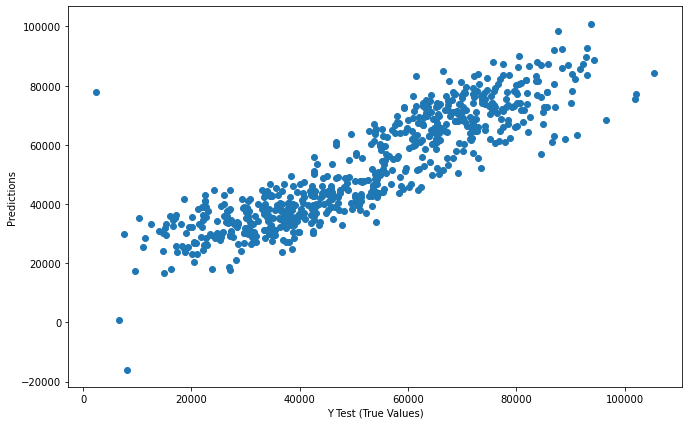

In [63]:
plt.figure(figsize=(11,7))
plt.scatter(y_test, final_df_lr_pre)
plt.xlabel("Y Test (True Values)")
plt.ylabel("Predictions")

## Supervised Classification Model (Random Forest)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

We are going to make a loop to see which is the best number of trees to use them as a feature. We can notice that piece of information because it has the highest mean. Because we want the maximum prediction score possible.

In [26]:
rf = RandomForestClassifier()

n_estimators_ = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,100]

for n in n_estimators_:
    rf.n_estimators = n
    scores = cross_val_score(rf, X_train, y_train)
    print(f"Number of Trees: {n}, Mean Accuracy: {np.mean(scores)}")

Number of Trees: 1, Mean Accuracy: 0.07378640776699028
Number of Trees: 2, Mean Accuracy: 0.07831715210355986
Number of Trees: 3, Mean Accuracy: 0.09514563106796117
Number of Trees: 4, Mean Accuracy: 0.1087378640776699
Number of Trees: 5, Mean Accuracy: 0.11779935275080906
Number of Trees: 10, Mean Accuracy: 0.12880258899676375
Number of Trees: 15, Mean Accuracy: 0.12815533980582525
Number of Trees: 20, Mean Accuracy: 0.12880258899676375
Number of Trees: 25, Mean Accuracy: 0.12880258899676375
Number of Trees: 30, Mean Accuracy: 0.13009708737864076
Number of Trees: 35, Mean Accuracy: 0.12944983818770228
Number of Trees: 40, Mean Accuracy: 0.12880258899676375
Number of Trees: 45, Mean Accuracy: 0.13009708737864076
Number of Trees: 50, Mean Accuracy: 0.12944983818770225
Number of Trees: 100, Mean Accuracy: 0.1307443365695793


With the previous higher Mean Accuracy, we will use the number of three as parameter to train our model.

In [57]:
rf = RandomForestClassifier(n_estimators=45)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=45)

Making predictions

In [58]:
rf_pre = rf.predict(X_test)

Performing of the model

In [61]:
mse = mean_squared_error(y_test, rf_pre)
mae = mean_absolute_error(y_test, rf_pre)

print("MSE:", mse)
print("RMSE: ", np.sqrt(mse))
print("MAE:", mae)
print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test, rf_pre)),2),"%")

MSE: 152663918.90497738
RMSE:  12355.724135192457
MAE: 8759.746606334842
Variance Score:  66.15 %


Note:

MSE: It is the difference between the real value and the predicted one. This metric is sensitive for outliers. For that reason, the RMSE is better. It is just use the sqrt of this value.

MAE: It is the average absolute difference between predicted and actual values. In this case, it has a better result because this metrics is not too sensitive with outliers.

Variance Score: It tells you how well our model is performing (from 0 to 100, being higher the best result).

Comparation between the first five predictions vs the real value.

In [46]:
crosstable = pd.DataFrame(rf_pre, y_test, columns = [["Real Value"]])
crosstable.reset_index().head()

,Income,Real Value
0,67272.0,66653.0
1,39228.0,34109.0
2,76800.0,72635.0
3,33569.0,35860.0
4,76068.0,63342.0


Plotting the model to have a better visual understanding. We can notice the outliers better.

Text(0, 0.5, 'Predictions')

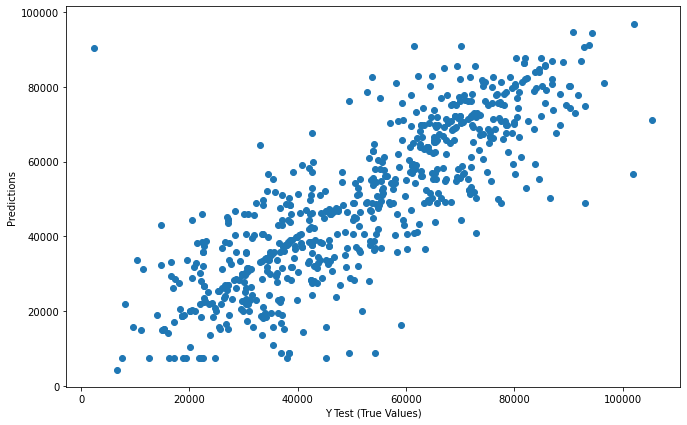

In [64]:
plt.figure(figsize=(11,7))
plt.scatter(y_test, rf_pre)
plt.xlabel("Y Test (True Values)")
plt.ylabel("Predictions")

## CONCLUSIONS FOR THE SUPERVISED MACHINE LEARNING MODELS

First sight we can notice a better performance of the Linear Regression against the Random Forest. This is because Linear Regression works better predicting continuous variables and Random Forest works better classifing values.

In [62]:
print("Linear Regression Results:")
print("MSE: ", metrics.mean_squared_error(y_test, final_df_lr_pre))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, final_df_lr_pre)))
print("MAE: ", metrics.mean_absolute_error(y_test, final_df_lr_pre))
print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test, final_df_lr_pre)),2),"%")
print("**********************************")
print("Random Forest Results:")
print("MSE:", mse)
print("RMSE: ", np.sqrt(mse))
print("MAE:", mae)
print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test, rf_pre)),2),"%")

Linear Regression Results:
MSE:  85927186.7479798
RMSE:  9269.691836732212
MAE:  7050.322275807919
Variance Score:  79.94 %
**********************************
Random Forest Results:
MSE: 152663918.90497738
RMSE:  12355.724135192457
MAE: 8759.746606334842
Variance Score:  66.15 %


## Unsupervised Clustering (PCA)

In [33]:
from sklearn.decomposition import PCA

Training the model

In [34]:
pca = PCA(n_components = 2)
pca.fit(final_df_lr)
x_pca = pca.transform(final_df_lr)
x_pca.shape

(2208, 2)

Analysing all the important components for this PCA model.

In [35]:
pca_comp = pd.DataFrame (pca.components_, columns = final_df_lr.columns)
pca_comp

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Married,Single,Together,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD
0,-0.000122,0.999899,-0.000014,0.000001,0.000008,0.011903,0.001036,0.007390,0.001461,0.001103,...,-2.553843e-07,-3.174115e-07,-1.453341e-08,3.890591e-07,-6.761929e-09,-8.450067e-07,-0.000002,4.115716e-07,3.828476e-07,0.000002
1,-0.000638,0.013151,0.000394,0.000222,-0.002601,-0.980510,-0.004502,-0.193139,-0.007294,-0.001404,...,2.128356e-05,9.171919e-06,-2.039124e-05,-2.820247e-07,-5.813740e-07,9.382483e-05,-0.000040,1.998070e-04,-4.085450e-05,-0.000213


Plotting a heatmap where we can see the most important components depending on each component.

<AxesSubplot:>

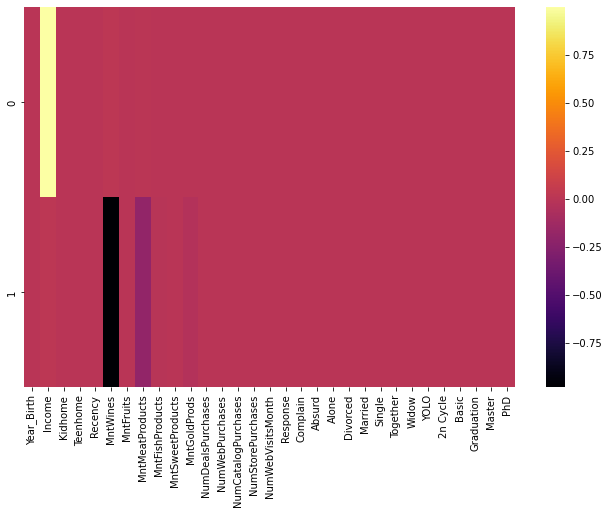

In [65]:
plt.figure(figsize=(11,7))
sns.heatmap(pca_comp, cmap = "inferno")

## UNSUPERVISED CONCLUSIONS

The Machine Learning is separating our dataset into two groups:

Income group: So we can create marketing strategies to improve the sales like sending emails with promotions for certain items.

No wine, meat group nor gold items: This is a insight that customers dont use to buy these items, so maybe have these products away. 